In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
 

In [2]:
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'tx':'_tauu.nc', 'ty':'_tauv.nc'}
models={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    if model in ['NESM3']:
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
            except Exception as e:
                print(e)
                pass
        #now append data to model dict
        models[model] = mod


[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_tauu.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_tauv.nc'


In [3]:
datadir = '/home/z5113258/Documents/data/REAN_HB/'
#dict with file names
varis = {'tx':'_tauu.nc', 'ty':'_tauv.nc'}
obs={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    mod={}
    for key in varis.keys():
        #input file
        inp_files = (os.path.join(datadir, model, str(model+varis[key])))
        try:
            #load in file
            var = xr.open_dataarray(inp_files)
            #put into dict
            mod[key]=var
            #now append data to model dict
            obs[model] = mod
        except Exception as e:
            print(e)
            pass




[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_tauu.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/OAFLUX/OAFLUX_tauv.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ORAS5/ORAS5_tauu.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ORAS5/ORAS5_tauv.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ARGO/ARGO_tauu.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/REAN_HB/ARGO/ARGO_tauv.nc'


In [4]:
models.keys()

dict_keys(['CanESM5', 'FGOALS-f3-L', 'CESM2-FV2', 'not_full', 'ACCESS-ESM1-5', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0', 'CESM2', 'EC-Earth3-Veg-LR', 'MPI-ESM1-2-HR', 'EC-Earth3-CC', 'CMCC-CM2-HR4', 'MPI-ESM1-2-LR', 'EC-Earth3', 'CESM2-WACCM-FV2', 'ACCESS-CM2', 'EC-Earth3-Veg', 'FGOALS-g3', 'CESM2-WACCM', 'MRI-ESM2-0', 'EC-Earth3-AerChem'])

In [5]:
models['ACCESS-CM2']

{'tx': <xarray.DataArray 'tauuo' (month: 12, lat: 60, lon: 260)>
 [187200 values with dtype=float32]
 Coordinates:
   * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 286.5 287.5 288.5 289.5
   * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12,
 'ty': <xarray.DataArray 'tauvo' (month: 12, lat: 60, lon: 260)>
 [187200 values with dtype=float32]
 Coordinates:
   * lon      (lon) float64 30.5 31.5 32.5 33.5 34.5 ... 286.5 287.5 288.5 289.5
   * lat      (lat) float64 -29.5 -28.5 -27.5 -26.5 -25.5 ... 26.5 27.5 28.5 29.5
   * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12}

In [4]:
def get_region(da, lat, lat_r, lon, lon_r):
    DA_ss = da.sel(lat=slice(lat, lat_r),lon=slice(lon, lon_r)).mean(['lat', 'lon'])
    return DA_ss

In [5]:
del models['not_full']

In [6]:
g_tu = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/uflx/*.nc').uflx
g_tv = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/vflx/*.nc').vflx

In [7]:
gu = g_tu.groupby('time.month').mean('time')
gv = g_tv.groupby('time.month').mean('time')


In [8]:
for i, mod in enumerate(models.keys()):
    tauu = models[mod]['tx']
    tauu = tauu.assign_coords({"model":i})
    if i == 0:
        tauum = tauu
    else:
        tauum = xr.concat([tauum, tauu], dim = 'model')

In [9]:
for i, mod in enumerate(models.keys()):
    tauv = models[mod]['ty']
    tauv = tauv.assign_coords({"model":i})
    if i == 0:
        tauvm = tauv
    else:
        tauvm = xr.concat([tauvm, tauv], dim = 'model')

In [10]:
tauuMM = tauum.median('model')
tauvMM = tauvm.median('model')

In [9]:
#get bias
BU = tauuMM - gu
BV = tauvMM - gv

NameError: name 'gu' is not defined

In [43]:
import cartopy.crs as ccrs

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

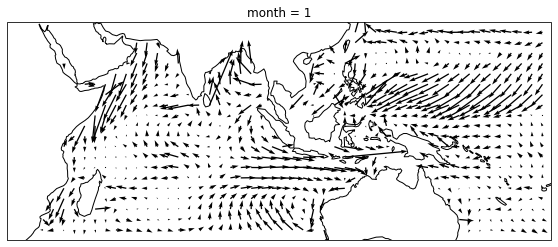

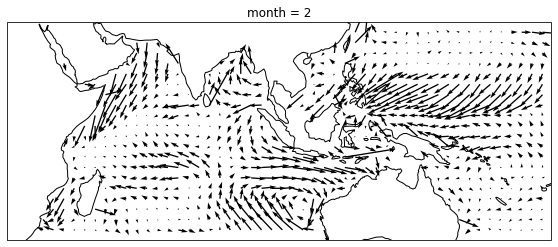

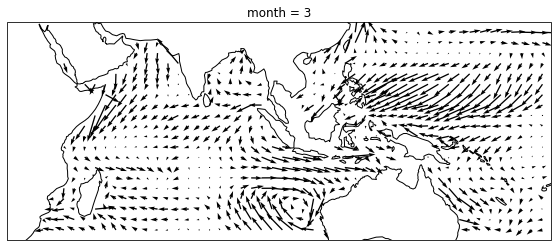

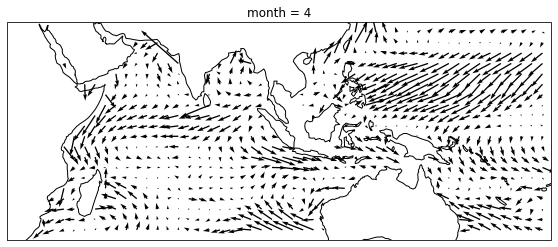

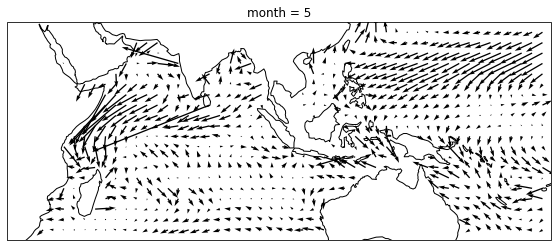

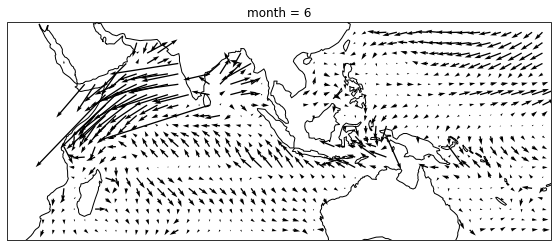

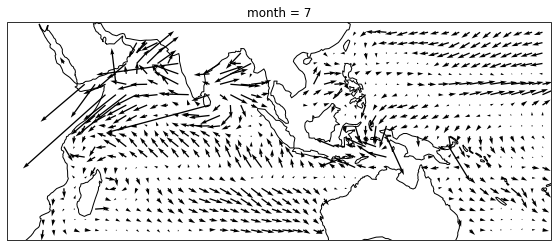

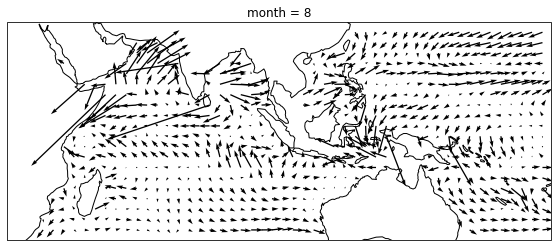

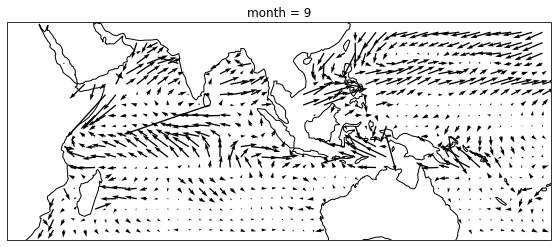

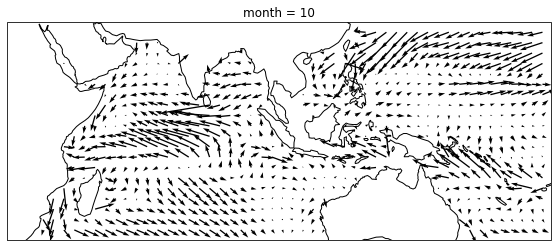

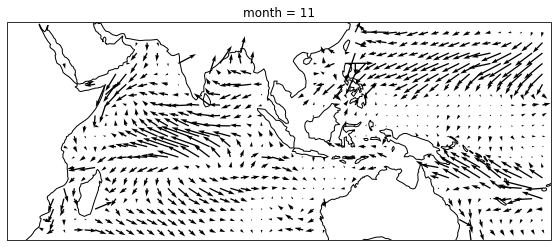

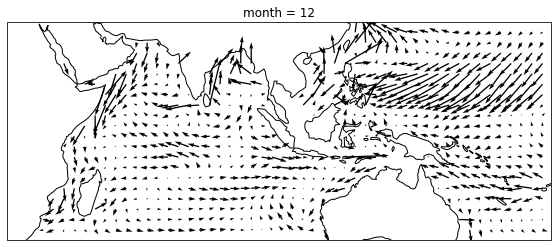

In [86]:
for i in range(0,12):
    fig = plt.figure(figsize = (12, 4))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.quiver(BU.lon[::3], BU.lat[::3], BU[i, ::3,::3], BV[i, ::3,::3], transform=ccrs.PlateCarree())
    plt.title('month = '+ str(i+1))
    ax.coastlines()

In [68]:
BU[0, ::2,::2]

<xarray.DataArray (lat: 30, lon: 75)>
dask.array<getitem, shape=(30, 75), dtype=float32, chunksize=(30, 75), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.5 -27.5 -25.5 -23.5 -21.5 ... 22.5 24.5 26.5 28.5
  * lon      (lon) float64 30.5 32.5 34.5 36.5 38.5 ... 172.5 174.5 176.5 178.5
    month    int64 1

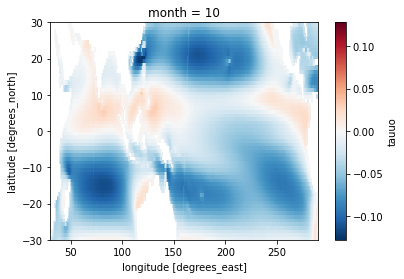

In [21]:
tauum.mean('model')[9].plot()

In [11]:
def plot_UWbias(lat, lat1, lon, lon1):
    plt.figure()
    get_region(tauuMM, lat, lat1, lon, lon1).plot(label = 'CMIP6')
    for ob in obs.keys():
        get_region(obs[ob]['tx'], lat, lat1, lon, lon1).plot(label = ob)
    plt.fill_between(range(1,13), get_region(((tauum.quantile(0.25, 'model'))),lat, lat1, lon, lon1),
                          get_region(((tauum.quantile(0.75, 'model'))), lat, lat1, lon, lon1), 
                          alpha = 0.25, )
    plt.legend()
    return


In [12]:
def plot_VWbias(lat, lat1, lon, lon1):
    plt.figure()
    get_region(tauvMM, lat, lat1, lon, lon1).plot(label = 'CMIP6')
    for ob in obs.keys():
        get_region(obs[ob]['ty'], lat, lat1, lon, lon1).plot(label = ob)
    plt.fill_between(range(1,13), get_region(((tauvm.quantile(0.25, 'model'))),lat, lat1, lon, lon1),
                          get_region(((tauvm.quantile(0.75, 'model'))), lat, lat1, lon, lon1), 
                          alpha = 0.25, )
    plt.legend()
    return


/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'WTIO U wind stress')

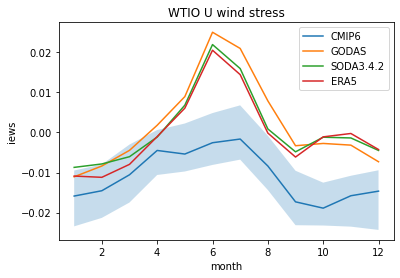

In [13]:
plot_UWbias(-10, 10, 50, 70)
plt.title('WTIO U wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'WTIO V wind stress')

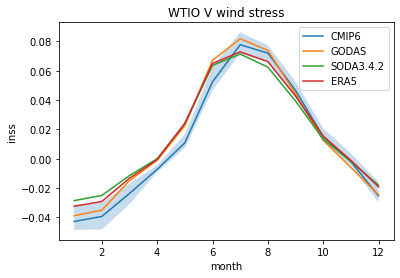

In [14]:
plot_VWbias(-10, 10, 50, 70)
plt.title('WTIO V wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'SETIO wind stress')

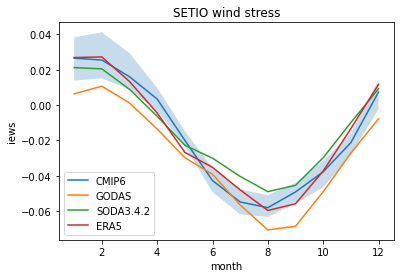

In [15]:
plot_UWbias(-10, 0, 90, 110)
plt.title('SETIO wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'SETIO V wind stress')

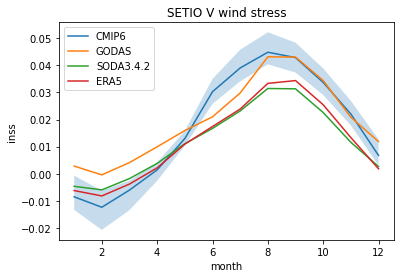

In [16]:
plot_VWbias(-10, 0, 90, 110)
plt.title('SETIO V wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'Equator U wind stress')

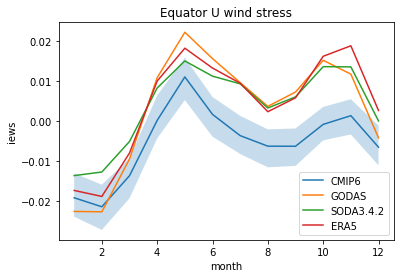

In [17]:
plot_UWbias(-3, 3, 40, 80)
plt.title('Equator U wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'Equator V wind stress')

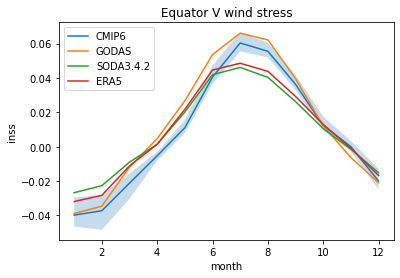

In [18]:
plot_VWbias(-3, 3, 40, 80)
plt.title('Equator V wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'Arab sea U wind stress')

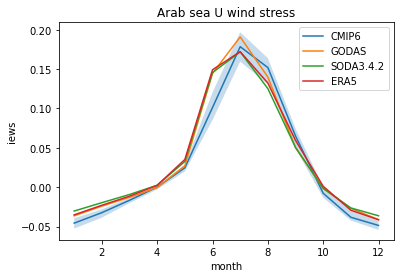

In [19]:
plot_UWbias(10, 20, 50, 70)
plt.title('Arab sea U wind stress')

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'arab sea V wind stress')

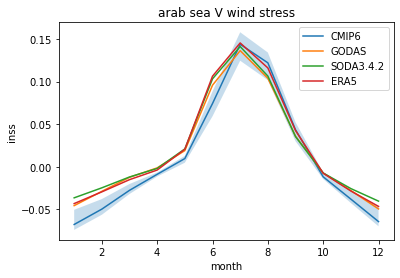

In [20]:
plot_VWbias(10, 20, 50, 70)
plt.title('arab sea V wind stress')

In [29]:
#look at regression of Uadv and U windstress
#load in Ua and UST
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'tx':'_tauu.nc', 'uadv':'_u_advection.nc', 'dtdx': '_dtx.nc', 'uc': '_ucur.nc', 'z20': '_z20.nc'}
models={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    if model in ['NESM3']:
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
                models[model] = mod
            except Exception as e:
                print(e)
                pass

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_tauu.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_u_advection.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_dtx.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_ucur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_z20.nc'


In [12]:
def linear_trend(x, y):
    pf = np.polyfit(x, y, 1)
    return xr.DataArray(pf[0])

In [13]:
def regress(var1, var2):
    slope = xr.apply_ufunc(linear_trend,
                        var1, var2,
                        vectorize=True,
                        dask = 'parallelized',
                        input_core_dims=[['model'], ['model']],# reduce along 'model'
                        )
    return slope

In [20]:
def get_model_DS(MODS, lat, lat_r, lon, lon_r):
    for i, model in enumerate(MODS.keys()):
        HB = MODS[model]
        U=get_region((-1*HB['uadv']), lat, lat_r, lon, lon_r)
        TAUU=get_region(HB['tx'], lat, lat_r, lon, lon_r)
        U = U.assign_coords({"model":model})
        TAUU = TAUU.assign_coords({"model":model})

        if i == 0:
            UM = U
            TUM=TAUU
        else:
            UM = xr.concat([UM, U], dim = 'model')
            TUM = xr.concat([TUM, TAUU], dim = 'model')
            
    DS = xr.Dataset(data_vars=dict(
            UM=(["model", "month"], UM),
            TUM=(["model", "month"], TUM)),
        coords=dict(
            month=(UM.month),
            model=(UM.model)),
        attrs=dict(description="Dataset of all heat budget varibales to correlate/scatter plot with"))
    return DS

In [30]:
DSU = get_model_DS(models, -10, 10, 50, 70)

In [22]:
import xskillscore as xs
C = xs.pearson_r(DSU['UM'], DSU['TUM'], dim = 'model')
P = xs.pearson_r_p_value(DSU['UM'], DSU['TUM'], dim = 'model')


In [23]:
sig = xr.where(P<0.05, C, 0)

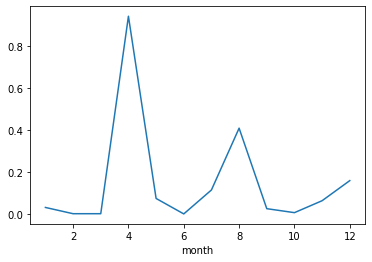

In [24]:
P.plot()

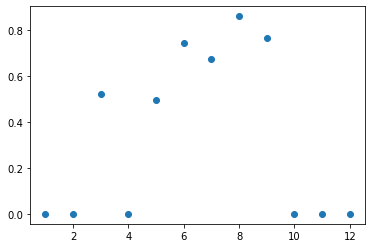

In [29]:
plt.scatter(sig.month, sig)

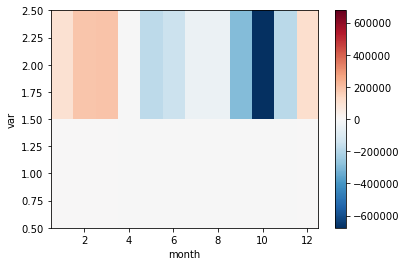

In [33]:
tu = regress(DSU['TUM'], DSU['UM']).assign_coords({"var":1})
tv = regress(DSU['UM'], DSU['TUM']).assign_coords({"var":2})
DA1 = xr.concat([tu, tv], dim = "var")
DA1.plot.imshow()

Text(0.5, 1.0, 'Zonal wind stress on zonal advection WTIO')

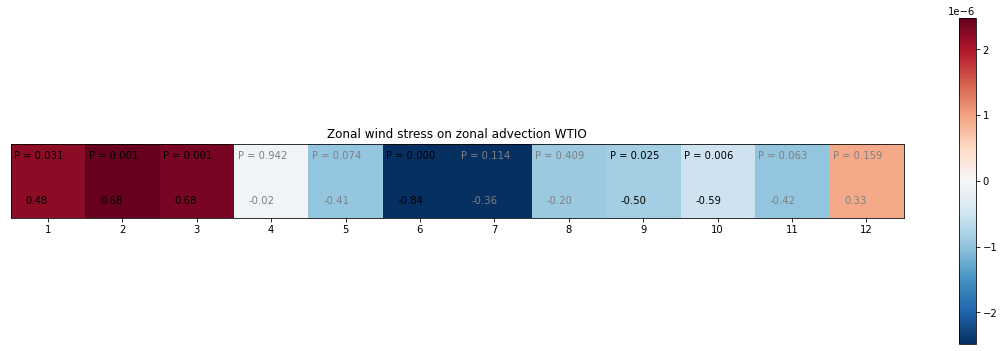

In [34]:
plt.figure(figsize=(20,6))
plt.imshow([tu.values], 'RdBu_r', vmin = -1*tu.values.max(), vmax = tu.values.max())
plt.colorbar()
for i in range(0,12):
    plt.text(i-0.3,0.3,f'{C.sel(month = i+1).values:.2f}', 
                     color = 'k' if P.sel(month = i+1).values < 0.05 else 'gray')
    plt.text(i-0.45,-0.3,f'P = {P.sel(month = i+1).values:.3f}', 
                     color = 'k' if P.sel(month = i+1).values < 0.05 else 'gray')
plt.xticks(range(0,12), range(1,13))   
plt.yticks([])
plt.title('Zonal wind stress on zonal advection WTIO')

The below plots show the intermodel regression of Tauu (x) and U adv(y). This shows that in may/june/July there is a considerable impact from zonal wind stress on the zonal advection. Models with stonger eastely wind stress have weaker cooling by zonal advection. This in turns leads to a bias in the temperature tendency and SST.  
This indicates that in May, for every 0.01N/m^2 more easterly the wind is, U advection reduces by 1.95W/m^2 (reudcing cooling). Along the same lines, in June, for every 0.01N/m^2 more easterly, U advection becomes 9.8W/m^2 more positve


In [36]:
(1e-6)/0.2


4.9999999999999996e-06

[7.341068e-08] [[2.2189336e-06]]
[6.892074e-08] [[2.475911e-06]]
[4.7398487e-08] [[2.3594764e-06]]
[7.486471e-09] [[-5.861383e-08]]
[-1.46708725e-08] [[-9.570401e-07]]
[-5.794581e-08] [[-4.7962553e-06]]
[-7.18677e-08] [[-3.1693037e-06]]
[-4.870223e-08] [[-9.10049e-07]]
[-2.377952e-08] [[-8.4852303e-07]]
[-3.2988407e-08] [[-5.175404e-07]]
[-6.1963526e-08] [[-9.792604e-07]]
[1.5837314e-08] [[9.4620293e-07]]


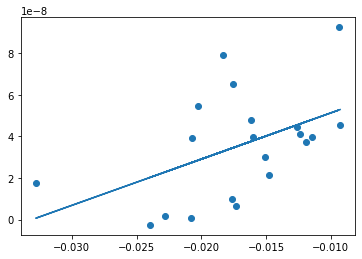

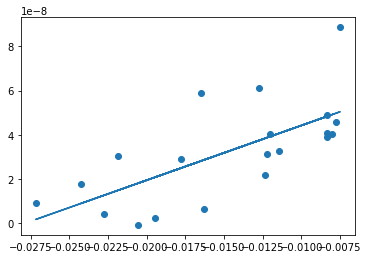

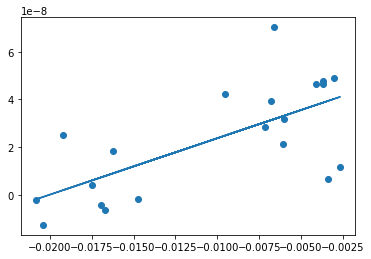

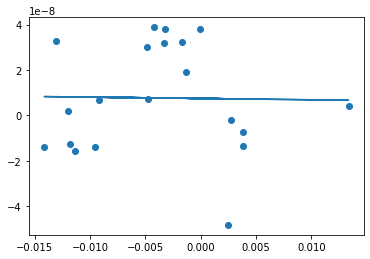

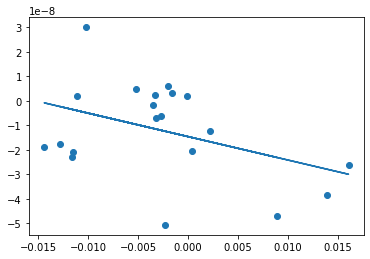

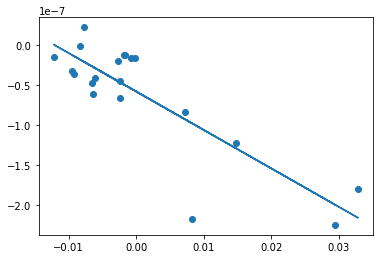

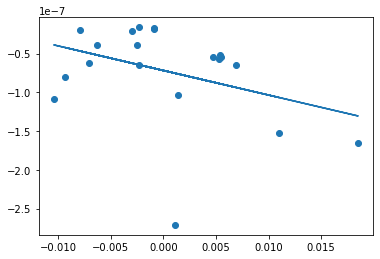

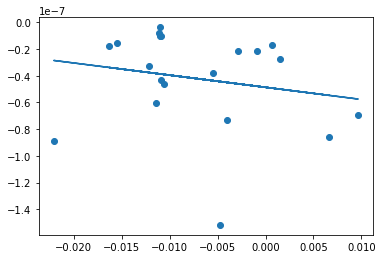

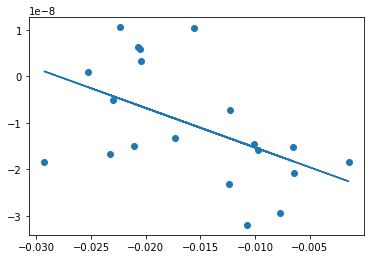

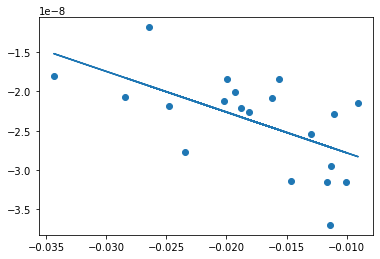

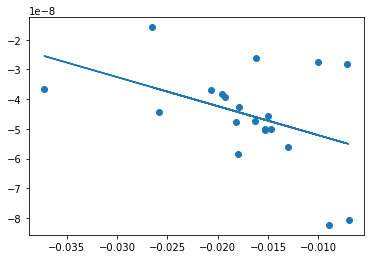

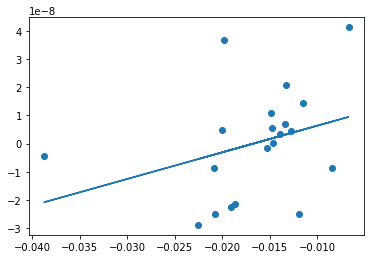

In [28]:
from sklearn.linear_model import LinearRegression
for i in range(0,12):
    regr = LinearRegression().fit(DSU.TUM[:,i].values.reshape(-1, 1), DSU.UM[:,i].values.reshape(-1, 1))
    print(regr.intercept_, regr.coef_)
    plt.figure()
    plt.scatter(DSU.TUM[:,i].values.reshape(-1, 1), DSU.UM[:,i].values.reshape(-1, 1))
    x = DSU.TUM[:,i].values.reshape(-1, 1)
    
    m = regr.coef_
    b= regr.intercept_


    plt.plot(x, m*x + b)

In [191]:
#lets get TC slope (IODW- IODE) and scatter against EEIO wind stress and WEIO wind stress
def get_model_TC_WND(MODS):
    for i, model in enumerate(MODS.keys()):
        HB = MODS[model]
        z20W=get_region((HB['z20']), -10, 10, 50, 70)
        z20E=get_region((HB['z20']), -10, 0, 90, 110)
        z20d = z20W-z20E 
        TAUU=get_region(HB['tx'], -10, 10, 50, 70)
        z20 = z20d.assign_coords({"model":model})
        TAUU = TAUU.assign_coords({"model":model})

        if i == 0:
            z20M = z20
            TUM=TAUU
        else:
            z20M = xr.concat([z20M, z20], dim = 'model')
            TUM = xr.concat([TUM, TAUU], dim = 'model')
            
    DS = xr.Dataset(data_vars=dict(
            z20M=(["model", "month"], z20M),
            TUM=(["model", "month"], TUM)),
        coords=dict(
            month=(z20M.month),
            model=(z20M.model)),
        attrs=dict(description="Dataset of all heat budget varibales to correlate/scatter plot with"))
    return DS

In [192]:
DS2 = get_model_TC_WND(models)

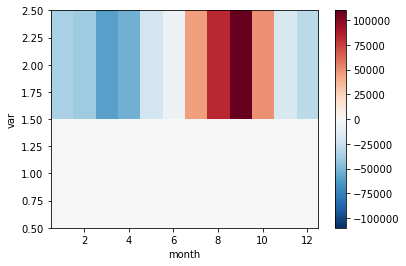

In [193]:
tz = regress(DS2['z20M'], DS2['TUM']).assign_coords({"var":1})
tz1 = regress(DS2['TUM'], DS2['z20M']).assign_coords({"var":2})
DA2 = xr.concat([tz, tz1], dim = "var")
DA2.plot.imshow()

In [194]:
C1 = xs.pearson_r(DS2['z20M'], DS2['TUM'], dim = 'model')
P1 = xs.pearson_r_p_value(DS2['z20M'], DS2['TUM'], dim = 'model')


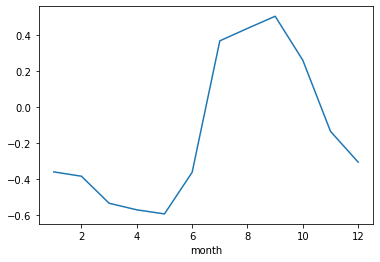

In [195]:
C1.plot()

In [198]:
P1

<xarray.DataArray (month: 12)>
array([0.11772631, 0.0934923 , 0.01500676, 0.00844554, 0.00570842,
       0.11518917, 0.11209203, 0.05500775, 0.02378599, 0.2707456 ,
       0.56784094, 0.18793565])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [199]:
#let's look at WSC and W current in SETIO region
#first load in data we want
#look at regression of Uadv and U windstress
#load in Ua and UST
datadir = '/home/z5113258/Documents/data/CMIP6_HB_new/'
#dict with file names
varis = {'wsc':'_wsc.nc', 'wcur':'_wcur.nc', 'z20': '_z20.nc'}
models={}
#get all data for temp tendency
for model in os.listdir(datadir):
    #go thorugh all varis
    if model in ['NESM3']:
        pass
    else:
        mod={}
        for key in varis.keys():
            #input file
            inp_files = (os.path.join(datadir, model, str(model+varis[key])))
            try:
                #load in file
                var = xr.open_dataarray(inp_files)
                #put into dict
                mod[key]=var
                models[model] = mod
            except Exception as e:
                print(e)
                pass

[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_wsc.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_wcur.nc'
[Errno 2] No such file or directory: b'/home/z5113258/Documents/data/CMIP6_HB_new/not_full/not_full_z20.nc'


In [203]:
#now lets get SETIO region DS
def get_model_DS(MODS, lat, lat_r, lon, lon_r):
    for i, model in enumerate(MODS.keys()):
        HB = MODS[model]
        U=get_region((HB['wsc']), lat, lat_r, lon, lon_r)
        TAUU=get_region(HB['wcur'], lat, lat_r, lon, lon_r).groupby('time.month').mean('time')
        U = U.assign_coords({"model":model})
        TAUU = TAUU.assign_coords({"model":model})

        if i == 0:
            UM = U
            TUM=TAUU
        else:
            UM = xr.concat([UM, U], dim = 'model')
            TUM = xr.concat([TUM, TAUU], dim = 'model')
            
    DS = xr.Dataset(data_vars=dict(
            UM=(["model", "month"], UM),
            TUM=(["model", "month"], TUM)),
        coords=dict(
            month=(UM.month),
            model=(UM.model)),
        attrs=dict(description="Dataset of all heat budget varibales to correlate/scatter plot with"))
    return DS

In [204]:
DS_SETIO = get_model_DS(models, -10, 0, 90, 110)

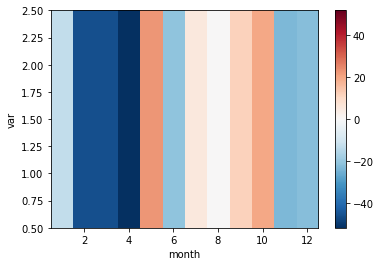

In [212]:
tu = regress(DS_SETIO['UM'], DS_SETIO['TUM']).assign_coords({"var":1})
tv = regress(DS_SETIO['UM'], DS_SETIO['TUM']).assign_coords({"var":2})
DA1 = xr.concat([tu, tv], dim = "var")
DA1.plot.imshow()

In [207]:
import xskillscore as xs
C = xs.pearson_r(DS_SETIO['UM'], DS_SETIO['TUM'], dim = 'model')
P = xs.pearson_r_p_value(DS_SETIO['UM'], DS_SETIO['TUM'], dim = 'model')


In [208]:
C

<xarray.DataArray (month: 12)>
array([-0.17086788, -0.67347354, -0.83759926, -0.5081374 ,  0.30337796,
       -0.7232739 ,  0.15475741,  0.00477717,  0.28621484,  0.23422516,
       -0.22009993, -0.1928143 ])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

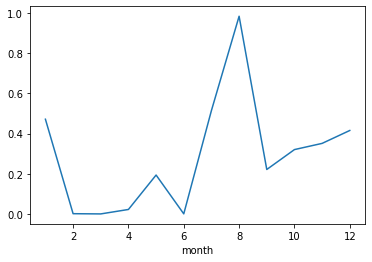

In [210]:
P.plot()

Text(0.5, 1.0, 'w currentr and wind stress curl')

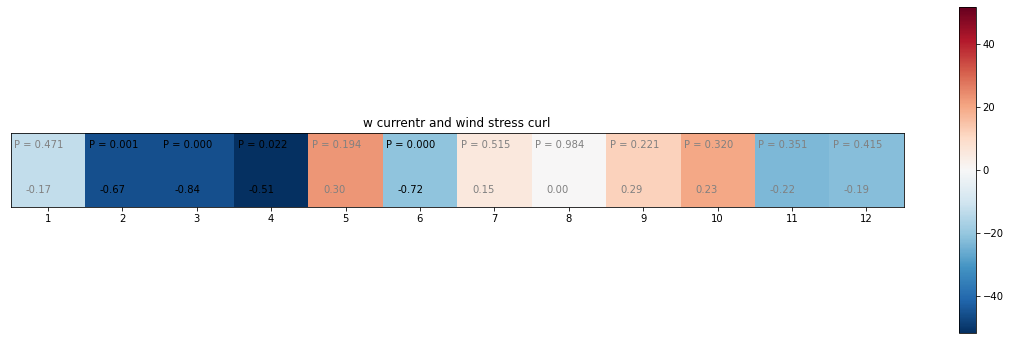

In [214]:
plt.figure(figsize=(20,6))
plt.imshow([tu.values], 'RdBu_r', vmin = tu.values.min(), vmax = -1*tu.values.min())
plt.colorbar()
for i in range(0,12):
    plt.text(i-0.3,0.3,f'{C.sel(month = i+1).values:.2f}', 
                     color = 'k' if P.sel(month = i+1).values < 0.05 else 'gray')
    plt.text(i-0.45,-0.3,f'P = {P.sel(month = i+1).values:.3f}', 
                     color = 'k' if P.sel(month = i+1).values < 0.05 else 'gray')
plt.xticks(range(0,12), range(1,13))   
plt.yticks([])
plt.title('w currentr and wind stress curl')

[-9.81702661e-09] [[-0.00230526]]
[1.28527433e-08] [[-0.01000222]]
[-2.53069601e-09] [[-0.01543928]]
[-4.66708496e-08] [[-0.00499247]]
[-8.41883878e-08] [[0.00400123]]
[-5.09012549e-08] [[-0.02529953]]
[-1.36200213e-07] [[0.00451018]]
[-1.08850284e-07] [[0.00010203]]
[-1.08749945e-07] [[0.00677297]]
[-8.13847014e-08] [[0.00276558]]
[-6.85855106e-08] [[-0.00206821]]
[-4.8884363e-08] [[-0.00168797]]


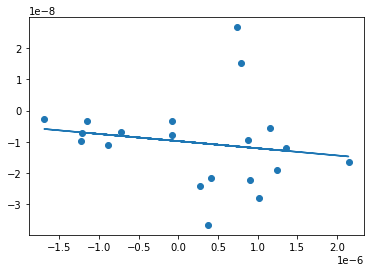

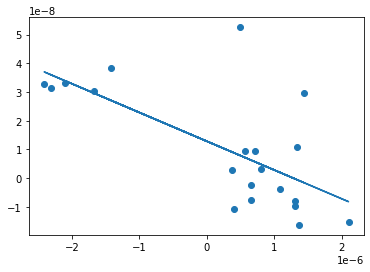

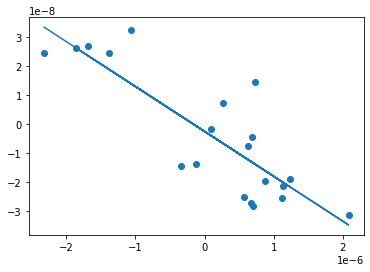

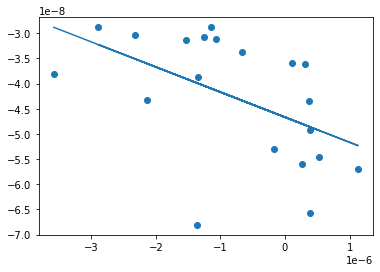

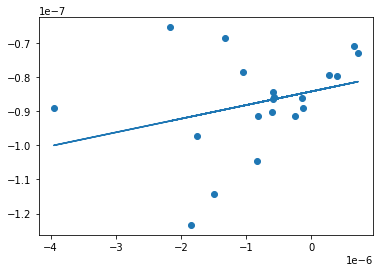

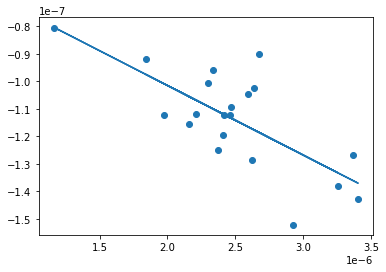

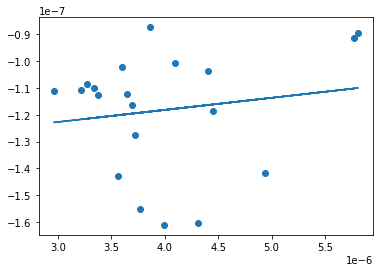

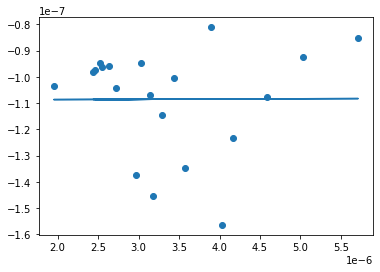

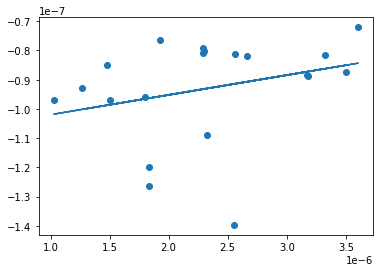

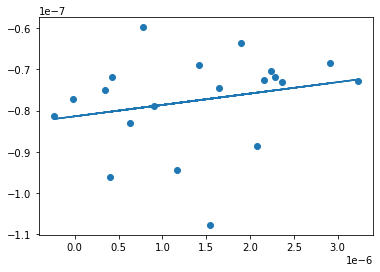

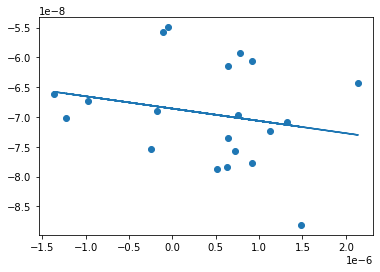

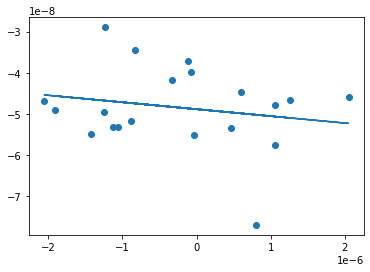

In [215]:
for i in range(0,12):
    regr = LinearRegression().fit(DS_SETIO.TUM[:,i].values.reshape(-1, 1), DS_SETIO.UM[:,i].values.reshape(-1, 1))
    print(regr.intercept_, regr.coef_)
    plt.figure()
    plt.scatter(DS_SETIO.TUM[:,i].values.reshape(-1, 1), DS_SETIO.UM[:,i].values.reshape(-1, 1))
    x = DS_SETIO.TUM[:,i].values.reshape(-1, 1)
    
    m = regr.coef_
    b= regr.intercept_


    plt.plot(x, m*x + b)